In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

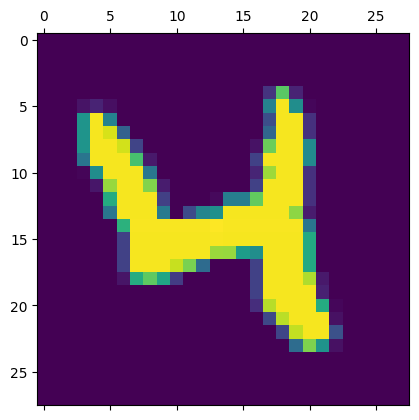

4


In [5]:
plt.matshow(x_train[20])
plt.show()
print(y_train[20])

In [6]:
#Scaling
x_train = x_train/255
x_test = x_test/255

In [7]:
#Flatten an image
# we need (60000,28,28) ==> (60000,28*28)
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)
x_train_flat.shape

(60000, 784)

In [24]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
#Single layer Model
model = keras.Sequential([
 keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])
#10 = 10 differnt o/p possible as the dataset has 10 types (0 to 9) of digits.
#Input_shape = no of features in one data point
model.compile(
    optimizer='sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 609us/step - loss: 0.7648 - accuracy: 0.8203
Epoch 2/20
1875/1875 [==============================] - 1s 588us/step - loss: 0.4560 - accuracy: 0.8806
Epoch 3/20
1875/1875 [==============================] - 1s 595us/step - loss: 0.4036 - accuracy: 0.8913
Epoch 4/20
1875/1875 [==============================] - 1s 560us/step - loss: 0.3773 - accuracy: 0.8966
Epoch 5/20
1875/1875 [==============================] - 1s 545us/step - loss: 0.3606 - accuracy: 0.9004
Epoch 6/20
1875/1875 [==============================] - 1s 572us/step - loss: 0.3489 - accuracy: 0.9035
Epoch 7/20
1875/1875 [==============================] - 1s 558us/step - loss: 0.3398 - accuracy: 0.9057
Epoch 8/20
1875/1875 [==============================] - 1s 592us/step - loss: 0.3327 - accuracy: 0.9075
Epoch 9/20
1875/1875 [==============================] - 1s 537us/step - loss: 0.3268 - accuracy: 0.9087
Epoch 10/20
1875/1875 [==============================] - 1s 550u

In [10]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 2s 512us/step - loss: 0.2871 - accuracy: 0.9200


[0.2871052026748657, 0.9200000166893005]

In [11]:
ypred = model.predict(x_test_flat)

313/313 [==============================] - 0s 475us/step


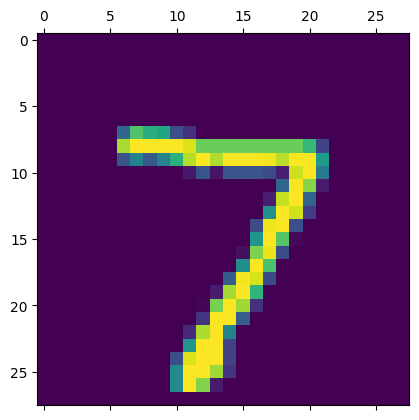

In [12]:
plt.matshow(x_test[0])
plt.show()

In [13]:
ypred[0]
#It is giving sigmoid of 10 differnt digits, whichever is the max that is the label.

array([6.2602347e-01, 4.3914205e-04, 7.4545962e-01, 9.8432118e-01,
       9.4136156e-02, 4.3401226e-01, 1.2252494e-03, 9.9995142e-01,
       4.7181654e-01, 9.3939799e-01], dtype=float32)

In [14]:
np.argmax(ypred[0])

7

In [15]:
ypred_labels = [np.argmax(i) for i in ypred]
ypred_labels[:5]
#Keeping the labels in one list.

[7, 2, 1, 0, 4]

<AxesSubplot: >

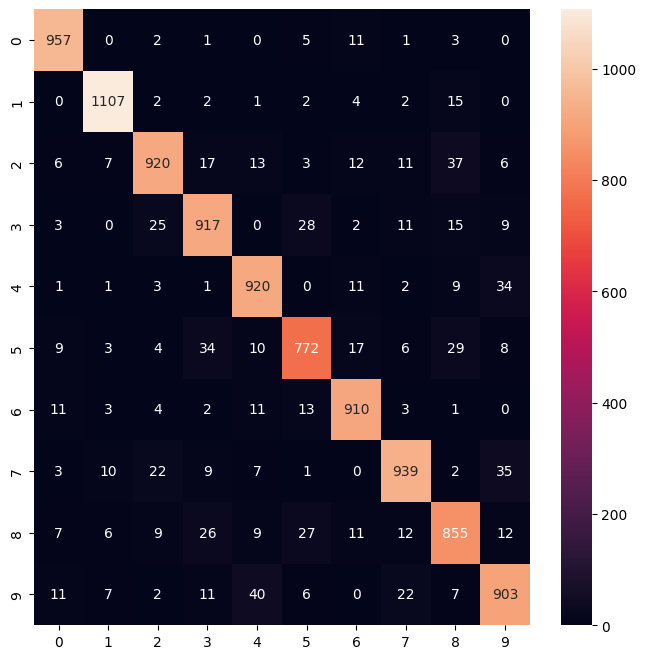

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=ypred_labels),annot=True,fmt='d')

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
#Double layer
# 1st layer having 100 neurons. You can have any number of neurons.
# 2nd layer is the o/p which has 10 differnt o/ps.
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.3100 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 2s 895us/step - loss: 0.1261 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.0849 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 2s 891us/step - loss: 0.0637 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.0482 - accuracy: 0.9852


In [18]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 837us/step - loss: 0.0803 - accuracy: 0.9759


[0.08034779131412506, 0.9758999943733215]

In [19]:
ypred = model.predict(x_test_flat)
ypred_labels = [np.argmax(i) for i in ypred]
ypred_labels[:5]

313/313 [==============================] - 0s 746us/step


[7, 2, 1, 0, 4]

<AxesSubplot: >

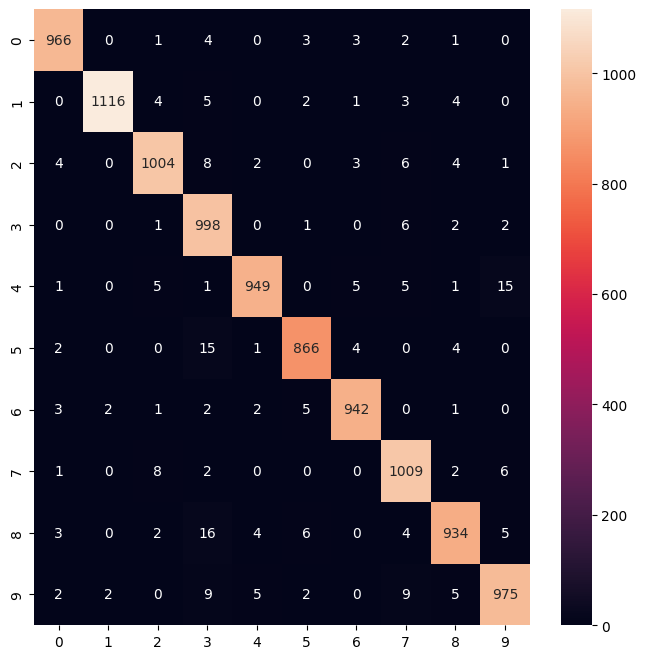

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=ypred_labels),annot=True,fmt='d')

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
#Here the image is flattend by the help of keras.
# No need to give the i/p shape again in the first layer.
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 900us/step - loss: 0.2682 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 2s 860us/step - loss: 0.1232 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 2s 844us/step - loss: 0.0883 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 2s 826us/step - loss: 0.0681 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 2s 807us/step - loss: 0.0538 - accuracy: 0.9833


In [22]:
x_test = x_test.reshape(len(x_test),28*28)
a = pd.DataFrame(x_test)
a

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
